## Multinomial Classification Problem 

In [4]:
# import packages and set themes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.metrics import (confusion_matrix, classification_report)
from sklearn import (linear_model, metrics, neural_network, pipeline, model_selection, tree)
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [14]:
betting_odds = pd.read_csv("betting_odds.csv")
betting_X = betting_odds[["AvgH", "AvgD", "AvgA"]]
betting_Y = betting_odds["FTR"]
betting_X_train, betting_X_test, betting_y_train, betting_y_test = model_selection.train_test_split(betting_X, betting_Y, test_size=0.25, random_state = 123)

In [154]:
classification_model = linear_model.LogisticRegression(multi_class = "multinomial", max_iter = 10000, solver = "lbfgs",
                                                       random_state = 123, fit_intercept = False)

classification_model.fit(betting_X, betting_Y)
class_train_pred = pd.DataFrame(data = classification_model.predict(betting_X_train))
class_test_pred = pd.DataFrame(classification_model.predict(betting_X_test))

classification_matrix = confusion_matrix(betting_y_train, class_train_pred)
report = pd.DataFrame(data = classification_report(betting_y_test, class_test_pred, output_dict = True))

classification_model.coef_

array([[ 0.16166023,  0.01272761, -0.14900167],
       [ 0.08674034, -0.18741224,  0.07460551],
       [-0.24840057,  0.17468463,  0.07439617]])

In [145]:
def classification_results_heatmap(model_name, testing_X_data, testing_Y_data): 
    predictions = model_name.predict(testing_X_data) 
    cf_matrix = confusion_matrix(testing_Y_data, predictions, labels = model_name.classes_)
    
    fig, ax = plt.subplots(1, 1, figsize = (15, 6))
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='inferno_r', ax = ax, xticklabels = model_name.classes_,
               yticklabels = model_name.classes_) 

    print(fig)

Figure(1500x600)


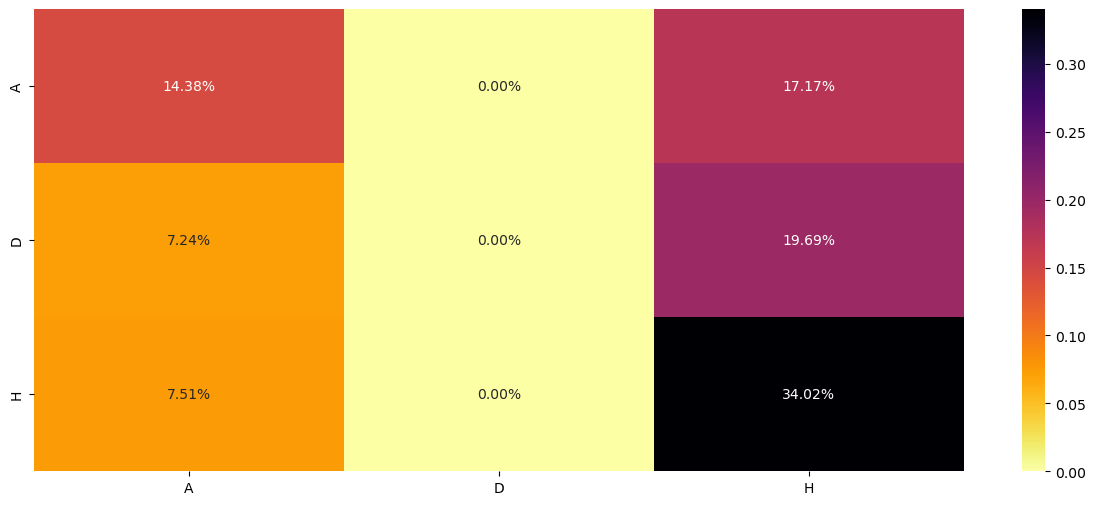

In [146]:
classification_results_heatmap(classification_model, betting_X_test, betting_y_test)

In [152]:
def classification_results_report(model_name, testing_X_data, testing_Y_data):
    predictions = model_name.predict(testing_X_data)
    report = classification_report(testing_Y_data, predictions, output_dict = True) 
    report_df = pd.DataFrame(data = report) 
    return report_df.iloc[0:3, 0:4]

In [153]:
classification_results_report(classification_model, betting_X_test, betting_y_test)

,A,D,H,accuracy
precision,0.493694,0.0,0.480000,0.48399
recall,0.455907,0.0,0.819216,0.48399
f1-score,0.474048,0.0,0.605325,0.48399
